In [571]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
#from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
#from statsmodels.api import OLS

# Load data, understand the df structure

In [572]:
candy_data = pd.read_csv('~echabanova/Documents/lidl_case_study/data/candy-data.csv')

In [573]:
# display top 5 rows to understand the data
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [574]:
candy_data.dtypes

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

- competitorname is a string
- all other columns are integers

In [575]:
# Check for missing data in the dataframe
missing_data = candy_data.isnull().sum()

# Get the shape of the dataframe
dataframe_shape = candy_data.shape

missing_data, dataframe_shape

(competitorname      0
 chocolate           0
 fruity              0
 caramel             0
 peanutyalmondy      0
 nougat              0
 crispedricewafer    0
 hard                0
 bar                 0
 pluribus            0
 sugarpercent        0
 pricepercent        0
 winpercent          0
 dtype: int64,
 (85, 13))

- No missing data in the dataframe
- 85 rows and 13 columns, i.e., the dataframe consists of 85 observations with 13 characteristics.
- The dataset is quite small for any complex modeling.

In [576]:
# Creating a DataFrame to display variable names and their unique values
unique_values_df = pd.DataFrame({
    'Variable': ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 
                 'crispedricewafer ', 'hard', 'bar', 'pluribus'],
    'Unique Values': [candy_data[col].unique() for col in ['chocolate', 'fruity', 'caramel', 
                                                   'peanutyalmondy', 'nougat', 
                                                   'crispedricewafer', 'hard', 'bar', 'pluribus']]
})
unique_values_df

,Variable,Unique Values
0,chocolate,"[1, 0]"
1,fruity,"[0, 1]"
2,caramel,"[1, 0]"
3,peanutyalmondy,"[0, 1]"
4,nougat,"[0, 1]"
5,crispedricewafer,"[1, 0]"
6,hard,"[0, 1]"
7,bar,"[1, 0]"
8,pluribus,"[0, 1]"


- All binary columns have indeed only two unique values: 0 and 1.


## "Weird candies" check

In [577]:
# Check for rows where all the specific columns have zero values without attempting to reload
columns_to_check = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 
                    'crispedricewafer', 'hard', 'bar', 'pluribus']

# Find rows where all of these columns are zero
rows_with_all_zeros = candy_data[(candy_data[columns_to_check] == 0).all(axis=1)]

# Return the number of rows where all the columns are zero
rows_with_all_zeros_count = rows_with_all_zeros.shape[0]
rows_with_all_zeros_count, rows_with_all_zeros.head()  # Display the count and first few rows (if any)

(2,
   competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
 2       One dime          0       0        0               0       0   
 3    One quarter          0       0        0               0       0   
 
    crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
 2                 0     0    0         0         0.011         0.116   
 3                 0     0    0         0         0.011         0.511   
 
    winpercent  
 2   32.261086  
 3   46.116505  )

- 2 rows have all binary columns set to 0.
- These rows are not informative and can be removed.
- These two rows are not candies, but a financial alternative to candies.
- In the original [study](http://walthickey.com/2017/10/18/whats-the-best-halloween-candy/) sometimes one could choose between a candy and either one quarter or one dime.
- These results show that one dime won overcandies in 32.3% of the cases and one quarter in 46.1% of the comparisons.

### Remove non-candies observations

In [578]:
# Remove rows where all the specified columns have zeros
df = candy_data[~(candy_data[columns_to_check] == 0).all(axis=1)]

# Check the number of rows after removal
df.shape

(83, 13)

# Descriptive statistics

In [579]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
chocolate,83.0,0.445783,0.500073,0.000000,0.00000,0.000000,1.000000,1.00000
fruity,83.0,0.457831,0.501247,0.000000,0.00000,0.000000,1.000000,1.00000
caramel,83.0,0.168675,0.376741,0.000000,0.00000,0.000000,0.000000,1.00000
peanutyalmondy,83.0,0.168675,0.376741,0.000000,0.00000,0.000000,0.000000,1.00000
nougat,83.0,0.084337,0.279582,0.000000,0.00000,0.000000,0.000000,1.00000
crispedricewafer,83.0,0.084337,0.279582,0.000000,0.00000,0.000000,0.000000,1.00000
hard,83.0,0.180723,0.387128,0.000000,0.00000,0.000000,0.000000,1.00000
bar,83.0,0.253012,0.437381,0.000000,0.00000,0.000000,0.500000,1.00000
pluribus,83.0,0.530120,0.502126,0.000000,0.00000,1.000000,1.000000,1.00000
sugarpercent,83.0,0.489916,0.276498,0.034000,0.26700,0.465000,0.732000,0.98800


- Except for winpercent, pricepercent and sugarpercent, all other columns are binary.
- Mean values for binary variables indicate the share of candies with a given property: e.g., 44.6% of candies are chocolate, 45.8% are fruity.
- Properties caramel, peanutyalmondy are present in 16.9% of candies.
- Properties nougat, crispedricewafer are present in 8.4% of candies.
- Properties hard, bar, pluribus are present in 18.0%, 25.3%, 53.0% of candies, respectively.
- Mean sugar content is 49.0%.
- DV is winpercent which ranges between 0 and 100%, i.e., between 0 and 1 - it may have implications for model selection. DV is continuous, range of possible values lies between 0 and 100% or 0 and 1 "in shares".

## Correlation matrix

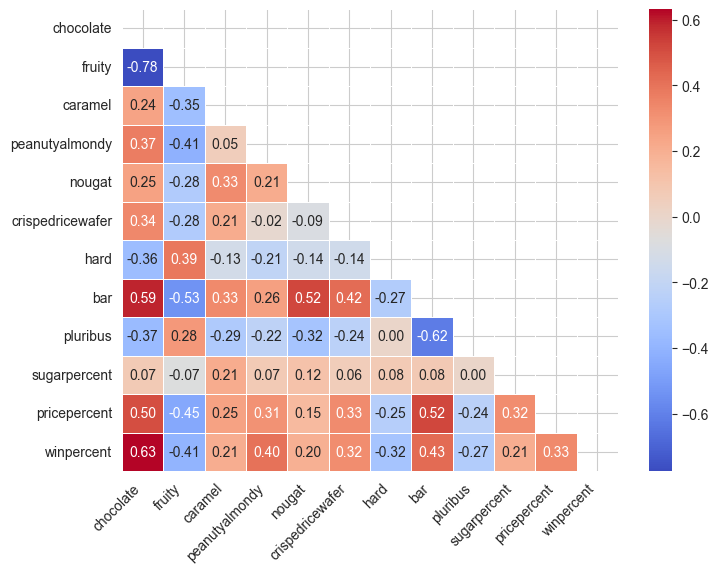

In [580]:
# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a mask for the upper triangle (including the diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5,  mask=mask)

# Rotate x-axis label to improve readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

- Strong positive correlation between winpercent and chocolate (0.63) and winpercent, bar (0.59), peanutyalmondy (0.37), pricepercent (0.50).
- It suggets that properties like chocolate, penuatyalmody, bar are important candy features for winpercent.
- Positive correlation between price ranking and winpercent (0.50) suggests that pricier candies are more popular.
- Positive correlations between chocolate and caramel, peanutyalmondy, nougat, crispedricewafer, and bar are indicative of possible flavor combinations. 
- **Flavor insight**: fruity is susceptible to be a standalone flavor, while chocolate seems to be often combined with other flavors.
- **Texture insight**: chocolate candies seem to come in bars, while fruity candies are more likely to be hard and/or pluribus.
- **Pricing insight**: chocolate and fruity candies could be for different price categories.

## Flavor and flavor combos in the sample

In [581]:
# Create a new column that concatenates the feature combinations into a single label for each candy
candy_flavors = df[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer']]

# Create a features-combo label
df['features_combo'] = candy_flavors.apply(lambda row: '+'.join([col for col in candy_flavors.columns if row[col] == 1]), axis=1)

# Group by the features combo, calculate the average win percentage and the number of candies with that combination
combo_summary = df.groupby('features_combo').agg(
    avg_winpercent=('winpercent', 'mean'),
    num_candies=('features_combo', 'size')
).reset_index()

/var/folders/vs/fn7cx3xn1rb6lxbyq0mdwk8w0000gn/T/ipykernel_1340/221284231.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features_combo'] = candy_flavors.apply(lambda row: '+'.join([col for col in candy_flavors.columns if row[col] == 1]), axis=1)


In [582]:
combo_summary

,features_combo,avg_winpercent,num_candies
0,,34.898987,4
1,caramel,35.857618,3
2,chocolate,50.344909,11
3,chocolate+caramel,61.711233,3
4,chocolate+caramel+crispedricewafer,74.307320,2
5,chocolate+caramel+nougat,66.950129,2
6,chocolate+caramel+peanutyalmondy+crispedricewafer,59.529251,1
7,chocolate+caramel+peanutyalmondy+nougat,66.794164,2
8,chocolate+crispedricewafer,63.761969,4
9,chocolate+fruity,48.982651,1


- 16 flavor combos are present in the sample.
- 4 candies have none of the flavors.
- there are many combos with chocolate, but there is not so much data per combo.
- fruity is indeed mostly standalone flavor.

### Plot winpercent distribution by flavor combos

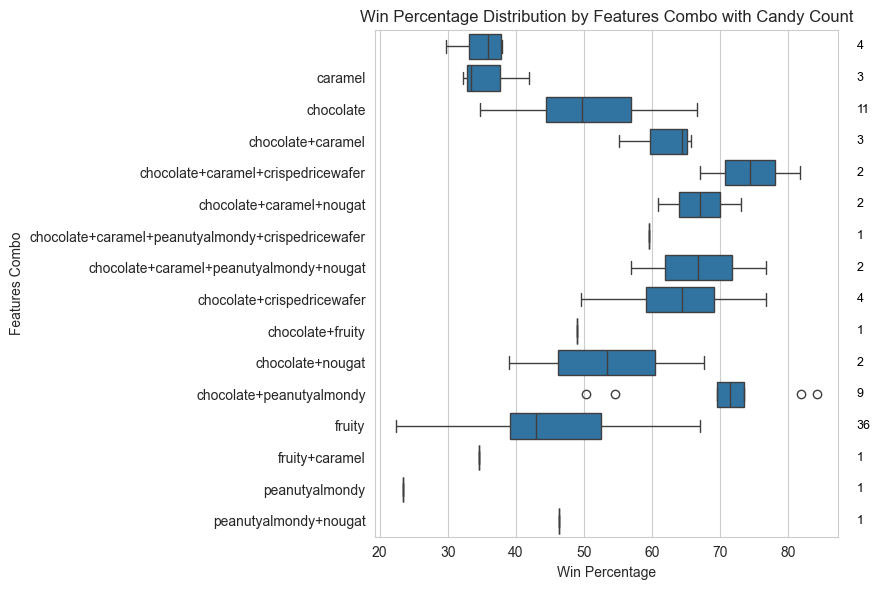

In [583]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, y='features_combo', x='winpercent', order=[f'{combo}' for combo in combo_summary['features_combo']])

# Use the correct number of candies from the combo_summary dataframe
count = df.groupby('features_combo')['competitorname'].count()
for i in range(len(count)): 
    occurance = int(count.iloc[i])
    plt.text(90, i, f'{occurance}', va='center', color='black', fontsize=9)

plt.title('Win Percentage Distribution by Features Combo with Candy Count')
plt.ylabel('Features Combo')
plt.xlabel('Win Percentage')
plt.tight_layout()
plt.show()

- In this figure I see the distribution of winpercent for each flavor combo.
- Fruity only is very widespread with mean winpercent below 50%.
- Winpercent for chocolate-based candies tends to grow once we add 1-2 flavors
- Chocolate+crispedricewafer, chocolate+peanutyalmondy seem promising: mean values are higher, distributions shift to the right, at least 4 candies per flavor.
- Not all possible flavor combos for chocolate-based candies are present. E.g., triples are always with caramel.

### Chocolate versus fruity candies (Mean comparisons in winpercent)

In [584]:
df.groupby(['chocolate', 'fruity'])['winpercent'].mean()

chocolate  fruity
0          0         35.209247
           1         43.988311
1          0         61.253165
           1         48.982651
Name: winpercent, dtype: float64

- average winpercent for fruity-based candies is 44.0% 
- average winpercent for chocolate-based candies is 61.3%.

In [585]:
# Create a new column 'd_choco_fruity' to categorize candies as chocolate, fruity.
df['d_choco_fruity'] = np.where((df['chocolate']==1) & (df['fruity']==0), 1, 
                             np.where((df['chocolate']==0) & (df['fruity']==1), 0, None))

/var/folders/vs/fn7cx3xn1rb6lxbyq0mdwk8w0000gn/T/ipykernel_1340/739649846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['d_choco_fruity'] = np.where((df['chocolate']==1) & (df['fruity']==0), 1,


- Out of 83 candies, I lose the following observations: 4 candies have neither of the flavors, 3 are caramel only, 1 peanutyalmondy, 1 peanutyalmondy+nougat (see the figure above).

#### Mann-Whitney U Test

In [586]:
chocolate_group = df[df['d_choco_fruity'] == 1]['winpercent']
fruity_group = df[df['d_choco_fruity'] == 0]['winpercent']

from scipy.stats import mannwhitneyu
# Perform the test
stat, p_value = mannwhitneyu(chocolate_group, fruity_group)

print(f'Mann-Whitney U Statistic: {stat}')
print(f'p-value: {p_value}')


Mann-Whitney U Statistic: 1125.0
p-value: 4.215300871182637e-07


- For mean winpercent comparison between chocolate and fruity candies, I use the Mann-Whitney U test.
- The sample size is small, so I use a non-parametric test.
- The null hypothesis is that the winpercent distributions are the same for chocolate and fruity candies.
- Given low p-value, I reject the null hypothesis and conclude that the winpercent distributions are different.


#### Visualize the comparison

In [587]:
# Determine the significance stars based on the p-value
if p_value < 0.01:
    significance = '***'
elif p_value < 0.05:
    significance = '**'
elif p_value < 0.1:
    significance = '*'
else:
    significance = 'ns'  # Not significant

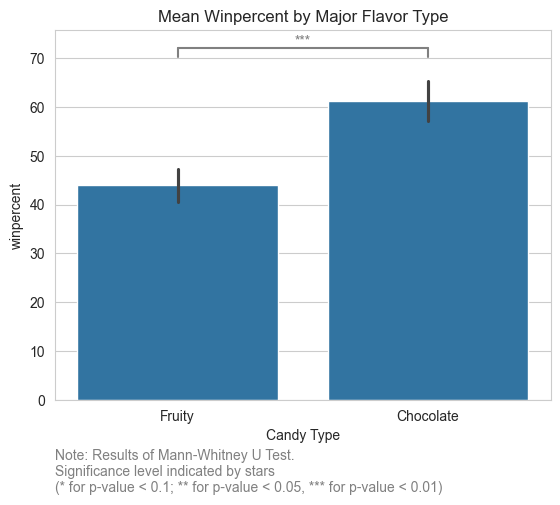

In [588]:
sns.barplot(x='d_choco_fruity', y='winpercent', data=df[df['d_choco_fruity'].notnull()])

# Add horizontal line
x1, x2 = 0, 1  # Positions of the two bars
y, h, col = df['winpercent'].max() - 12, 2, 'grey'  # y is the height of the horizontal line, h is the height of the vertical lines

# Draw the horizontal line
plt.plot([x1, x2], [y, y], lw=1.5, c=col)

# Draw the vertical lines
plt.plot([x1, x1], [y, y-h], lw=1.5, c=col)
plt.plot([x2, x2], [y, y-h], lw=1.5, c=col)

# Add the significance stars
plt.text((x1 + x2) * 0.5, y + h - 2, significance, ha='center', va='bottom', color=col)

# Set the title
plt.title('Mean Winpercent by Major Flavor Type')

# Rename the x-axis and labels
plt.xlabel('Candy Type')
plt.xticks([0, 1], ['Fruity', 'Chocolate'])

# Add a footnote (annotate)
plt.annotate('Note: Results of Mann-Whitney U Test. \nSignificance level indicated by stars \n(* for p-value < 0.1; ** for p-value < 0.05, *** for p-value < 0.01)', xy=(0, -0.25), xycoords='axes fraction', ha='left', fontsize=10, color='gray')

# Show the plot
plt.show()

# Explore flavor combinations
## Chocolate-flavored candies

In [589]:
# First, create a new column that concatenates the feature combinations into a single label for each candy
candy_flavors = df[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer']]

# Create a features-combo label
df['features_combo'] = candy_flavors.apply(lambda row: '+'.join([col for col in candy_flavors.columns if row[col] == 1]), axis=1)

# Group by the features combo, calculate the average win percentage and the number of candies with that combination
combo_summary = df.groupby('features_combo').agg(
    avg_winpercent=('winpercent', 'mean'),
    num_candies=('features_combo', 'size')
).reset_index()


/var/folders/vs/fn7cx3xn1rb6lxbyq0mdwk8w0000gn/T/ipykernel_1340/4166211951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features_combo'] = candy_flavors.apply(lambda row: '+'.join([col for col in candy_flavors.columns if row[col] == 1]), axis=1)


- Unpopular flavor combos may be dropped: chocolate-fruity, fruity+caramel, peanutyalmondy, peanutyalmondy+nougat: single observations per combo with probability of winnning below 50%.

/var/folders/vs/fn7cx3xn1rb6lxbyq0mdwk8w0000gn/T/ipykernel_1340/1436422477.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['styled_features_combo'] = df['features_combo'].apply(format_label)
/var/folders/vs/fn7cx3xn1rb6lxbyq0mdwk8w0000gn/T/ipykernel_1340/1436422477.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='styled_features_combo', x='winpercent',
/var/folders/vs/fn7cx3xn1rb6lxbyq0mdwk8w0000gn/T/ipykernel_1340/1436422477.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

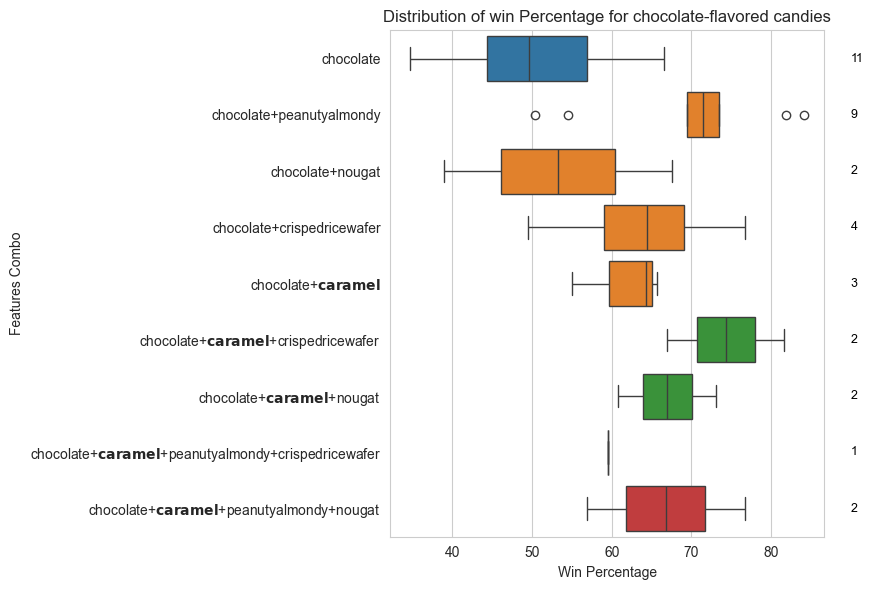

In [590]:
combo_chocolate_flavors = ['chocolate',
'chocolate+peanutyalmondy',
'chocolate+nougat',
'chocolate+crispedricewafer',
'chocolate+caramel',
'chocolate+caramel+crispedricewafer',
'chocolate+caramel+nougat',
'chocolate+caramel+peanutyalmondy+crispedricewafer',
'chocolate+caramel+peanutyalmondy+nougat'
]

# Create a dictionary for color coding
colors = {
    'chocolate': '#1f77b4',  # Color 1
    'chocolate+peanutyalmondy': '#ff7f0e',  # Color 2
    'chocolate+nougat': '#ff7f0e',  # Color 2
    'chocolate+crispedricewafer': '#ff7f0e',  # Color 2
    'chocolate+caramel': '#ff7f0e',  # Color 3
    'chocolate+caramel+crispedricewafer': '#2ca02c',  # Color 3
    'chocolate+caramel+nougat': '#2ca02c',  # Color 3
    'chocolate+caramel+peanutyalmondy+crispedricewafer': '#d62728',  # Color 4
    'chocolate+caramel+peanutyalmondy+nougat': '#d62728',  # Color 4
}

# Apply HTML styling for the word 'caramel'
def format_label(label):
    return label.replace('caramel', r'$\bf{caramel}$')

# Create a new column in the dataframe for styled feature combos
df['styled_features_combo'] = df['features_combo'].apply(format_label)

# Initialize the plot
plt.figure(figsize=(9, 6))

# Create boxplot with custom colors for each combo
sns.boxplot(data=df, y='styled_features_combo', x='winpercent',
            order=[format_label(c) for c in combo_chocolate_flavors],
            palette=[colors[c] for c in combo_chocolate_flavors])

# Use the correct number of candies from the combo_summary dataframe
sample_df = df[df['features_combo'].isin(combo_chocolate_flavors)]
# Convert the 'features_combo' column to a categorical type with the desired order
sample_df['features_combo'] = pd.Categorical(sample_df['features_combo'], categories=combo_chocolate_flavors, ordered=True)
# Sort the dataframe based on this new categorical column
sample_df_sorted = sample_df.sort_values('features_combo')
count = sample_df.groupby('features_combo')['competitorname'].count()
for i in range(len(count)): 
    occurance = int(count.iloc[i])
    plt.text(90, i, f'{occurance}', va='center', color='black', fontsize=9)


# Set title and axis labels
plt.title('Distribution of win Percentage for chocolate-flavored candies')
plt.ylabel('Features Combo')
plt.xlabel('Win Percentage')

# Adjust layout to fit everything
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/vs/fn7cx3xn1rb6lxbyq0mdwk8w0000gn/T/ipykernel_1340/4079094716.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['styled_features_combo'] = df['features_combo'].apply(format_label)
/var/folders/vs/fn7cx3xn1rb6lxbyq0mdwk8w0000gn/T/ipykernel_1340/4079094716.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='styled_features_combo', x='winpercent',
/var/folders/vs/fn7cx3xn1rb6lxbyq0mdwk8w0000gn/T/ipykernel_1340/4079094716.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

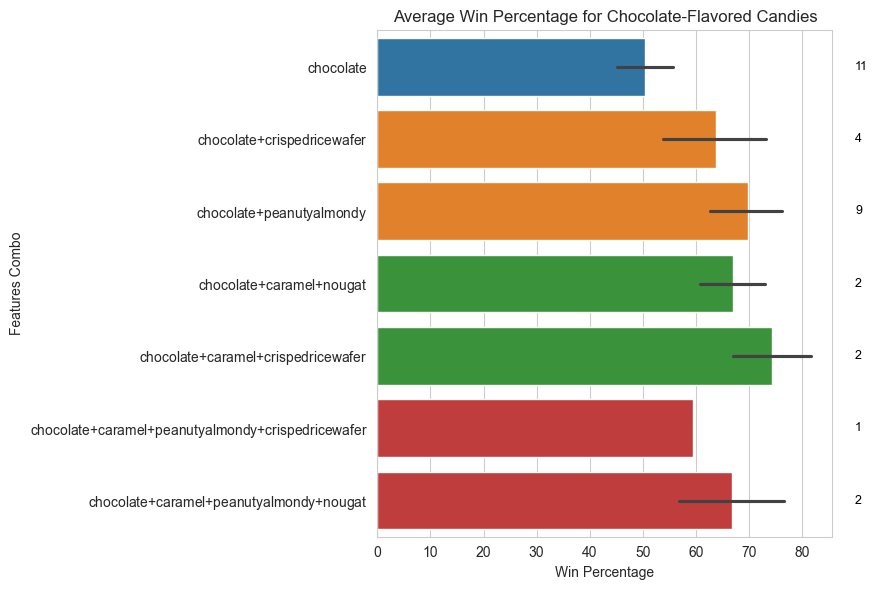

In [628]:
combo_chocolate_flavors = ['chocolate',
    #'chocolate+nougat',
    #'chocolate+caramel',
    'chocolate+crispedricewafer',
    'chocolate+peanutyalmondy',
    'chocolate+caramel+nougat',
    'chocolate+caramel+crispedricewafer',
    'chocolate+caramel+peanutyalmondy+crispedricewafer',
    'chocolate+caramel+peanutyalmondy+nougat'
]

# Create a dictionary for color coding
colors = {
    'chocolate': '#1f77b4',  # Color 1
    'chocolate+peanutyalmondy': '#ff7f0e',  # Color 2
    'chocolate+nougat': '#ff7f0e',  # Color 2
    'chocolate+crispedricewafer': '#ff7f0e',  # Color 2
    'chocolate+caramel': '#ff7f0e',  # Color 3
    'chocolate+caramel+crispedricewafer': '#2ca02c',  # Color 3
    'chocolate+caramel+nougat': '#2ca02c',  # Color 3
    'chocolate+caramel+peanutyalmondy+crispedricewafer': '#d62728',  # Color 4
    'chocolate+caramel+peanutyalmondy+nougat': '#d62728',  # Color 4
}

# Apply HTML styling for the word 'caramel'
def format_label(label):
    return label.replace('', r'$\bf{}$')

# Create a new column in the dataframe for styled feature combos
df['styled_features_combo'] = df['features_combo'].apply(format_label)

# Initialize the plot
plt.figure(figsize=(9, 6))

# Create barplot with error bars (confidence intervals)
sns.barplot(data=df, y='styled_features_combo', x='winpercent',
            order=[format_label(c) for c in combo_chocolate_flavors],
            palette=[colors[c] for c in combo_chocolate_flavors])  # 'ci' stands for confidence intervals, you can also set this to a specific value like ci=95 for 95%

# Use the correct number of candies from the combo_summary dataframe
sample_df = df[df['features_combo'].isin(combo_chocolate_flavors)]
# Convert the 'features_combo' column to a categorical type with the desired order
sample_df['features_combo'] = pd.Categorical(sample_df['features_combo'], categories=combo_chocolate_flavors, ordered=True)
# Sort the dataframe based on this new categorical column
sample_df_sorted = sample_df.sort_values('features_combo')
count = sample_df.groupby('features_combo')['competitorname'].count()
for i in range(len(count)): 
    occurance = int(count.iloc[i])
    plt.text(90, i, f'{occurance}', va='center', color='black', fontsize=9)

# Set title and axis labels
plt.title('Average Win Percentage for Chocolate-Flavored Candies')
plt.ylabel('Features Combo')
plt.xlabel('Win Percentage')

# Adjust layout to fit everything
plt.tight_layout()

# Show the plot
plt.show()

## Explore the number of features

In [608]:
# Filter data for chocolate = 1
df_chocolate = df[df['chocolate'] == 1]
binary_columns = ['caramel', 'peanutyalmondy',
                 'nougat', 'crispedricewafer'] # , 'hard', 'bar', 'pluribus'

# Create a new column 'num_characteristics' that sums the binary columns for each competitorname
df_chocolate['num_characteristics'] = df_chocolate[binary_columns].sum(axis=1)

/var/folders/vs/fn7cx3xn1rb6lxbyq0mdwk8w0000gn/T/ipykernel_1340/2822221156.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chocolate['num_characteristics'] = df_chocolate[binary_columns].sum(axis=1)


In [609]:
# Calculate the correlation between num_characteristics and winpercent
correlation = df_chocolate['num_characteristics'].corr(df['winpercent'])

# Display the correlation
print("Correlation between num_characteristics and winpercent:", correlation)

Correlation between num_characteristics and winpercent: 0.46265385325018993


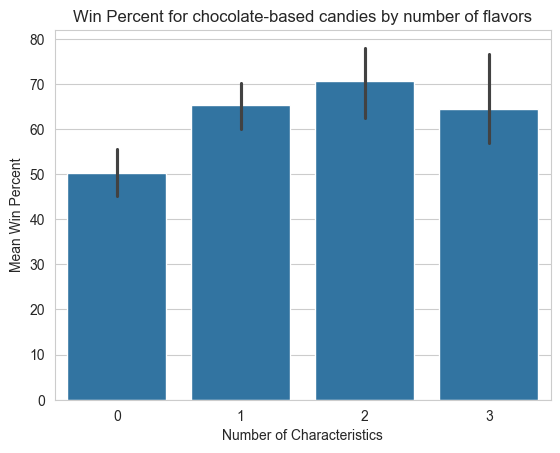

In [631]:
# Group by 'num_characteristics' and calculate mean and confidence intervals for 'winpercent'
sns.barplot(x='num_characteristics', y='winpercent', data=df_chocolate, errorbar = "ci")

# Set plot labels and title
plt.xlabel('Number of Characteristics')
plt.ylabel('Mean Win Percent')
plt.title('Win Percent for chocolate-based candies by number of flavors')

# Display the plot
plt.show()

- The correlation between the number of characteristics and winpercent is 0.46.
- More properties in candies are associated with greater popularity (higher winpercent).
- It is reasonable to consider adding at least one flavor to a chocolate-based candy due to increase in winpercent.
- Candies with 1+ additional flavors are more likely to be popular.
- No gains from adding more than 3 flavors compared to 2 flavors.

In [629]:
df_chocolate.groupby("num_characteristics")["winpercent"].mean()

num_characteristics
0    50.231388
1    65.315970
2    70.628724
3    64.372527
Name: winpercent, dtype: float64

## Regression analysis
- Disclaimer: given small sample size, I will not use a train-test split.
- For classification task, there is not enough data to train a model.
- I will use a linear regression model to explore the relationship between winpercent and other flavor-based features.
- The results should be interpreted with caution, given small sample size and very few observations on some flavor-combos.

In [611]:
model = ols(
    'winpercent ~ chocolate+chocolate:peanutyalmondy+chocolate:crispedricewafer+chocolate:crispedricewafer+chocolate:caramel+fruity +sugarpercent',
    data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     14.66
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           4.80e-11
Time:                        11:38:34   Log-Likelihood:                -308.73
No. Observations:                  83   AIC:                             631.5
Df Residuals:                      76   BIC:                             648.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

- The model explains 53.6% of variance in winpercent.
- Chocolate candies tend to have higher winpercent.
- To win over customers, chocolate should be combined with peanutyalmondy or crispedricewafer.
- Chocolate-caramel is not significant, however, there are only 2 observations for such flavor. 
- Fruity as a flavor contributes less winpercent.
- **General recommendation:** Lidl should focus on producing chocolate candies with peanutyalmondy or crispedricewafer.

# EDA for price segments

In [612]:
# Calculate the 33rd and 67th percentiles
low_threshold = df['pricepercent'].quantile(0.33)
high_threshold = df['pricepercent'].quantile(0.67)

# Define the function to categorize pricepercent into price_segment
def categorize_price_segment(price):
    if price <= low_threshold:
        return 'low'  # Low price segment
    elif price <= high_threshold:
        return 'mid'  # Middle price segment
    else:
        return 'high'  # High price segment

# Apply the function to create a new column 'price_segment'
df['price_segment'] = df['pricepercent'].apply(categorize_price_segment)

# Display the first few rows to check the result
df[['competitorname', 'pricepercent', 'price_segment']]

/var/folders/vs/fn7cx3xn1rb6lxbyq0mdwk8w0000gn/T/ipykernel_1340/2469533065.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_segment'] = df['pricepercent'].apply(categorize_price_segment)


,competitorname,pricepercent,price_segment
0,100 Grand,0.860,high
1,3 Musketeers,0.511,mid
4,Air Heads,0.511,mid
5,Almond Joy,0.767,high
6,Baby Ruth,0.767,high
...,...,...,...
80,Twizzlers,0.116,low
81,Warheads,0.116,low
82,Welch's Fruit Snacks,0.313,low
83,Werther's Original Caramel,0.267,low


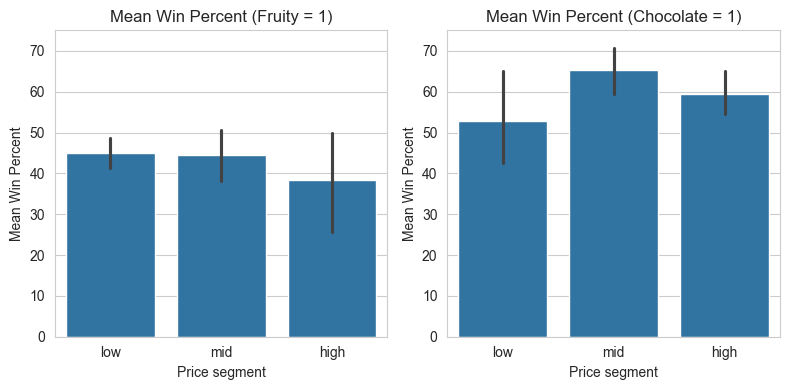

In [613]:
# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Scenario 1: fruity = 1
df_fruity = df[df['fruity'] == 1]
sns.barplot(x='price_segment', y='winpercent', data=df_fruity, ax=axes[0], order=['low', 'mid', 'high'])
axes[0].set_xlabel('Price segment')
axes[0].set_ylabel('Mean Win Percent')
axes[0].set_title('Mean Win Percent (Fruity = 1)')

# Scenario 2: chocolate = 1
#df_chocolate = df[df['chocolate'] == 1]
sns.barplot(x='price_segment', y='winpercent', data=df_chocolate, ax=axes[1], order=['low', 'mid', 'high'])
axes[1].set_xlabel('Price segment')
axes[1].set_ylabel('Mean Win Percent')
axes[1].set_title('Mean Win Percent (Chocolate = 1)')

# Set common y-axis limits
y_min = min(df_fruity['winpercent'].min(), df_chocolate['winpercent'].min())
y_max = max(df_fruity['winpercent'].max(), df_chocolate['winpercent'].max())

axes[0].set_ylim(0, 75)
axes[1].set_ylim(0, 75)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

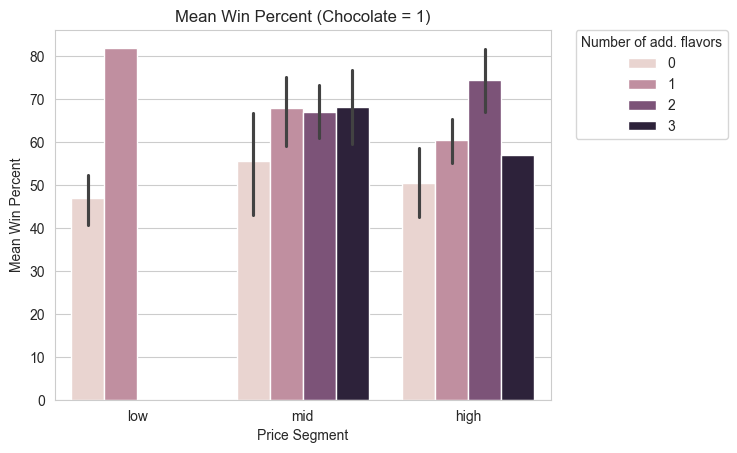

In [614]:
# Plot for chocolate = 1
sns.barplot(
    hue='num_characteristics',
    y='winpercent',
    x='price_segment',
    data=df_chocolate,
    order=['low', 'mid', 'high']
)
plt.title('Mean Win Percent (Chocolate = 1)')
plt.xlabel('Price Segment')
plt.ylabel('Mean Win Percent')

# Move legend outside the figure
plt.legend(title='Number of add. flavors', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

- Low price segment: unclear pattern.
- Middle price segment: chocolate candies with 1+ additional flavor. Suggestion: chocolate + peanutalmondy.
- High price segment: chocolate candies with 2 additional flavors. Suggestion: chocolate + caramel + X, crispedricewafer or nougat. 